# Exercise 02

## Time Series Analysis

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 02.1 Find the values of rho for which a series becomes non-stationary. rho between 0 and 1 ([0,1]) \n",
`X(t) = Rho * X(t-1) + Er(t)`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

In [30]:
for i in range(101):
    print(i/100)
    print('p-value: %f' % adfuller(ts(rho=i/100))[1])

0.0
p-value: 0.000000
0.01
p-value: 0.000000
0.02
p-value: 0.009889
0.03
p-value: 0.000000
0.04
p-value: 0.000000
0.05
p-value: 0.000000
0.06
p-value: 0.000000
0.07
p-value: 0.000000
0.08
p-value: 0.000000
0.09
p-value: 0.000000
0.1
p-value: 0.000000
0.11
p-value: 0.000000
0.12
p-value: 0.000000
0.13
p-value: 0.000000
0.14
p-value: 0.000000
0.15
p-value: 0.000000
0.16
p-value: 0.000000
0.17
p-value: 0.000000
0.18
p-value: 0.000025
0.19
p-value: 0.000000
0.2
p-value: 0.000000
0.21
p-value: 0.000000
0.22
p-value: 0.000000
0.23
p-value: 0.000000
0.24
p-value: 0.000000
0.25
p-value: 0.000000
0.26
p-value: 0.000000
0.27
p-value: 0.000000
0.28
p-value: 0.000000
0.29
p-value: 0.000000
0.3
p-value: 0.000000
0.31
p-value: 0.000000
0.32
p-value: 0.000000
0.33
p-value: 0.000000
0.34
p-value: 0.000005
0.35
p-value: 0.000000
0.36
p-value: 0.000000
0.37
p-value: 0.000000
0.38
p-value: 0.000000
0.39
p-value: 0.000000
0.4
p-value: 0.000000
0.41
p-value: 0.000000
0.42
p-value: 0.000000
0.43
p-value: 0.

Se puede observar que la serie deja de ser estacional a partir de rho=0.9 con respecto a la serie generada aleatoriamente.

# 02.2 Download and explore two series from google trends

In [31]:
df = pd.read_csv('carrosmotosbici.csv', skiprows=1)
df.head()

,Mes,carros: (Colombia),motos: (Colombia),bicicletas: (Colombia)
0,2004-01,31,14,3
1,2004-02,25,14,4
2,2004-03,29,12,4
3,2004-04,36,16,2
4,2004-05,28,12,4


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mes                     198 non-null    object
 1   carros: (Colombia)      198 non-null    int64 
 2   motos: (Colombia)       198 non-null    int64 
 3   bicicletas: (Colombia)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [33]:
df.columns = ['month', 'Car', 'Moto',"bici"]
df.head()

,month,Car,Moto,bici
0,2004-01,31,14,3
1,2004-02,25,14,4
2,2004-03,29,12,4
3,2004-04,36,16,2
4,2004-05,28,12,4


In [34]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

df.head()

,Car,Moto,bici
month,,,
2004-01-01,31,14,3
2004-02-01,25,14,4
2004-03-01,29,12,4
2004-04-01,36,16,2
2004-05-01,28,12,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2004-01-01 to 2020-06-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Car     198 non-null    int64
 1   Moto    198 non-null    int64
 2   bici    198 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


Text(0.5, 0, 'Year')

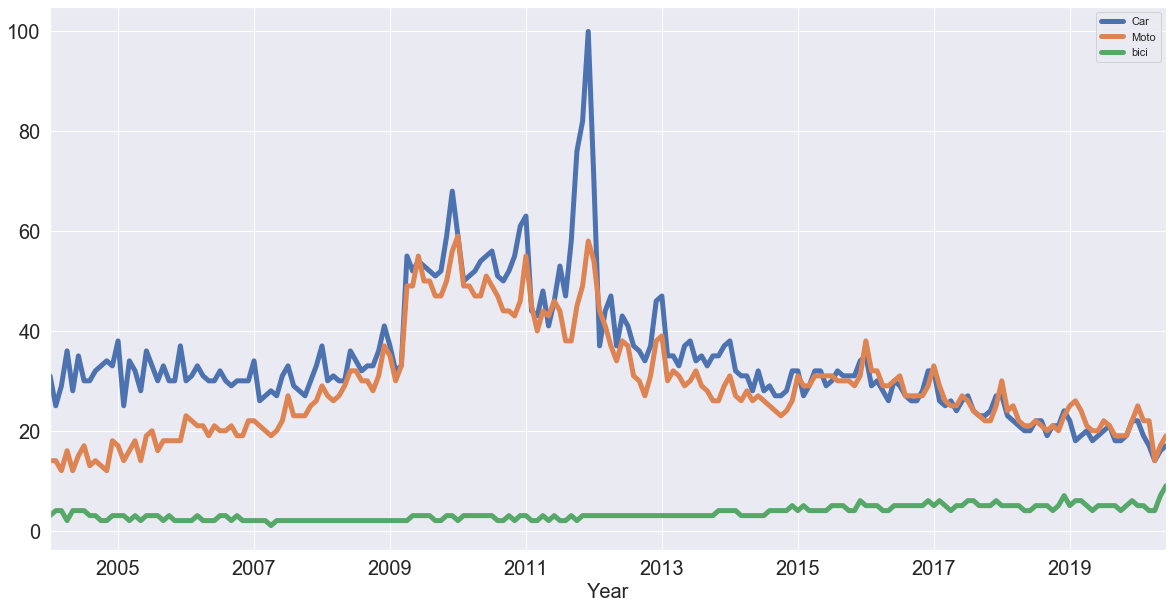

In [36]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

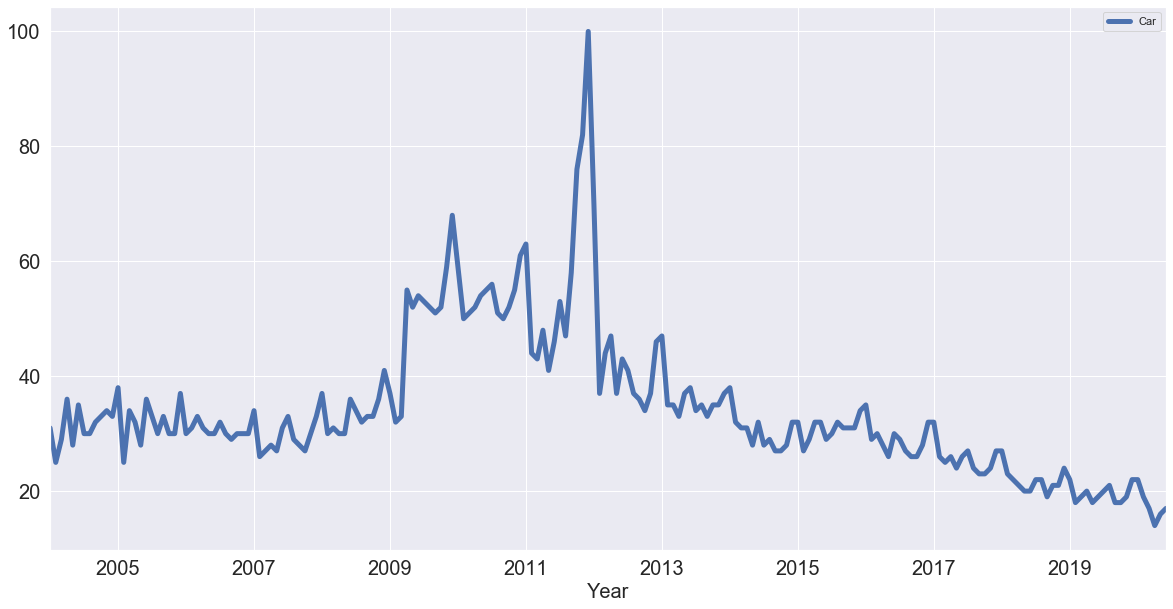

In [37]:
df[['Car']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

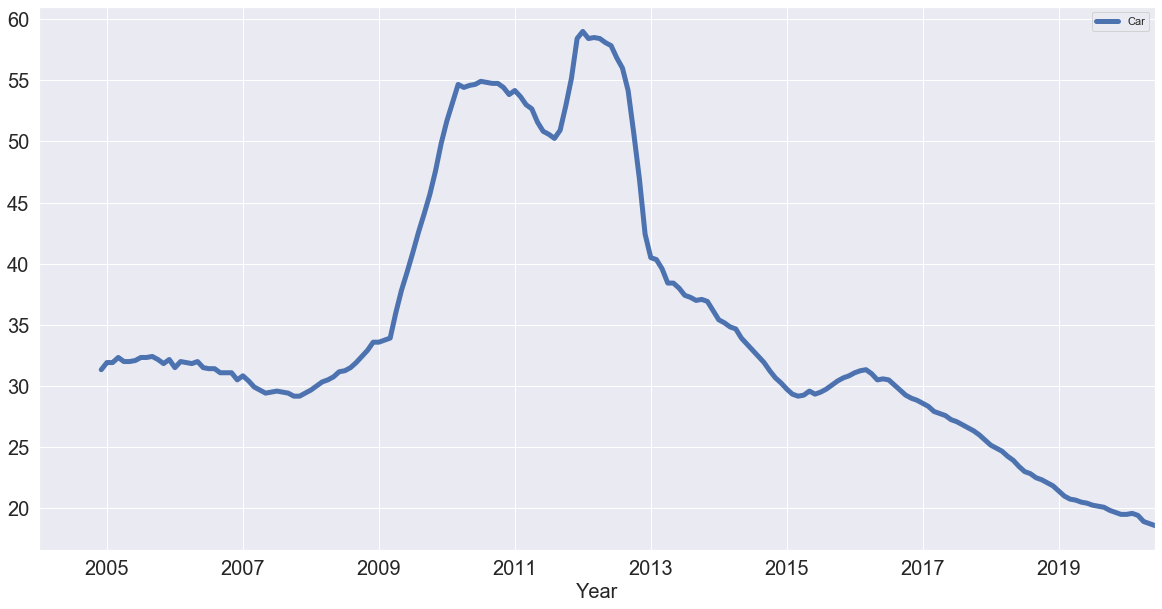

In [38]:
Apto = df[['Car']]
Apto.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

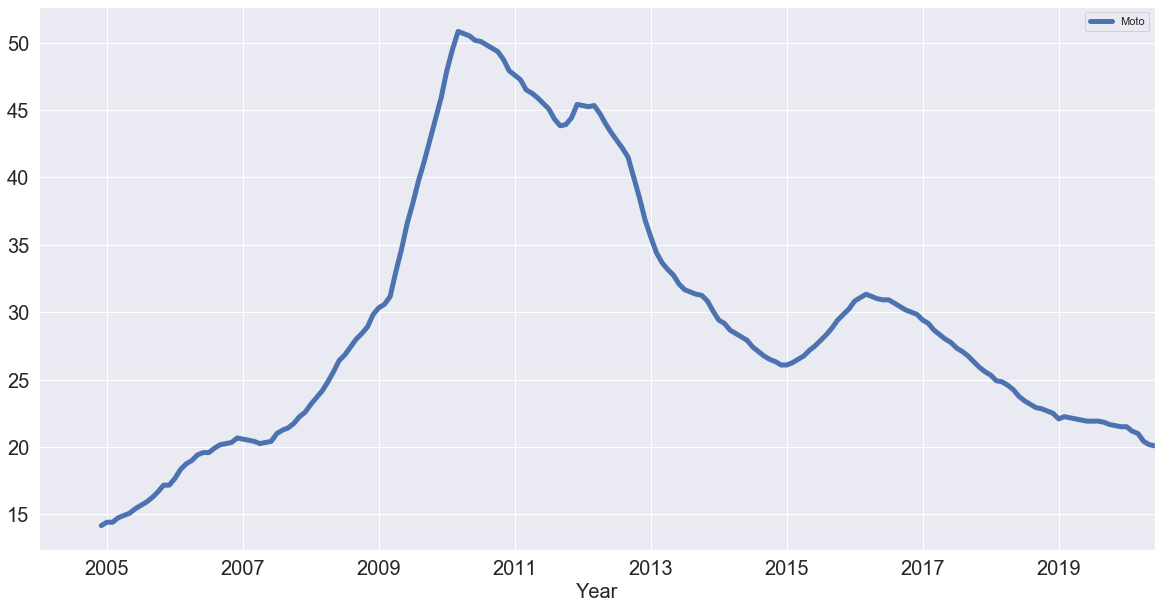

In [39]:
Car = df[['Moto']]
Car.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

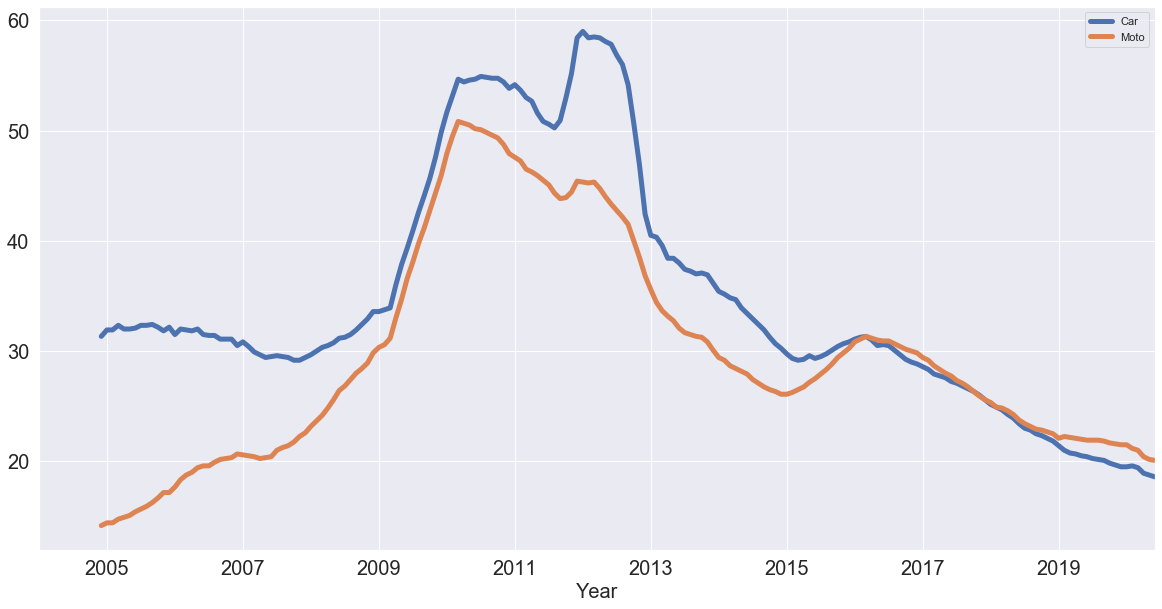

In [40]:
df[['Car', 'Moto']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

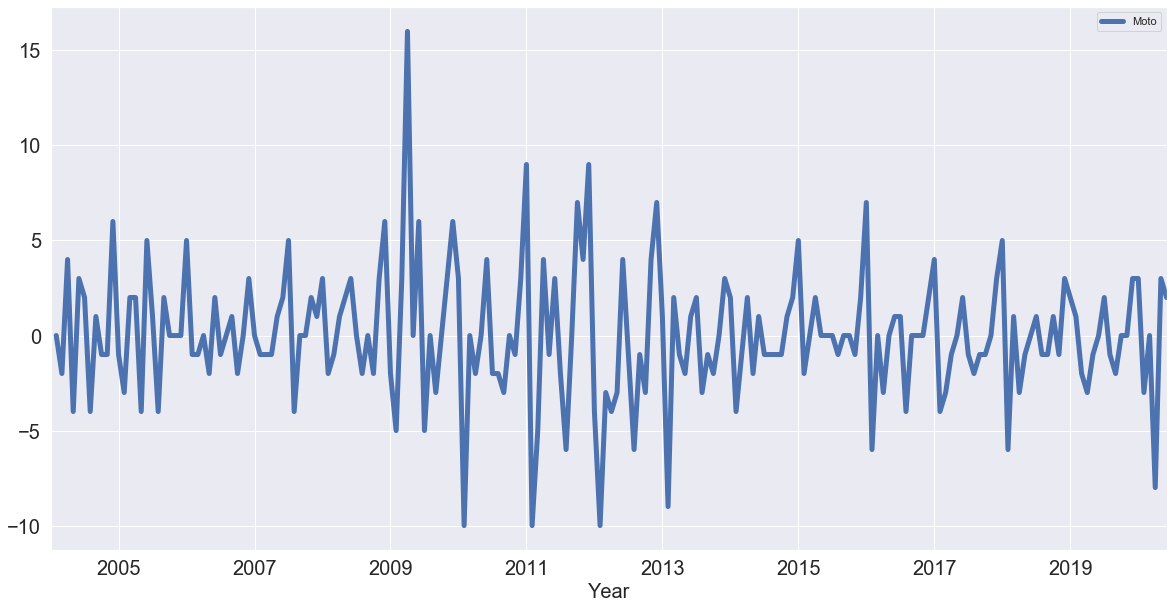

In [57]:
Car.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [42]:
result = adfuller(df['Car'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.877552
p-value: 0.795275
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


In [43]:
result = adfuller(df['Car'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.545467
p-value: 0.000163
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


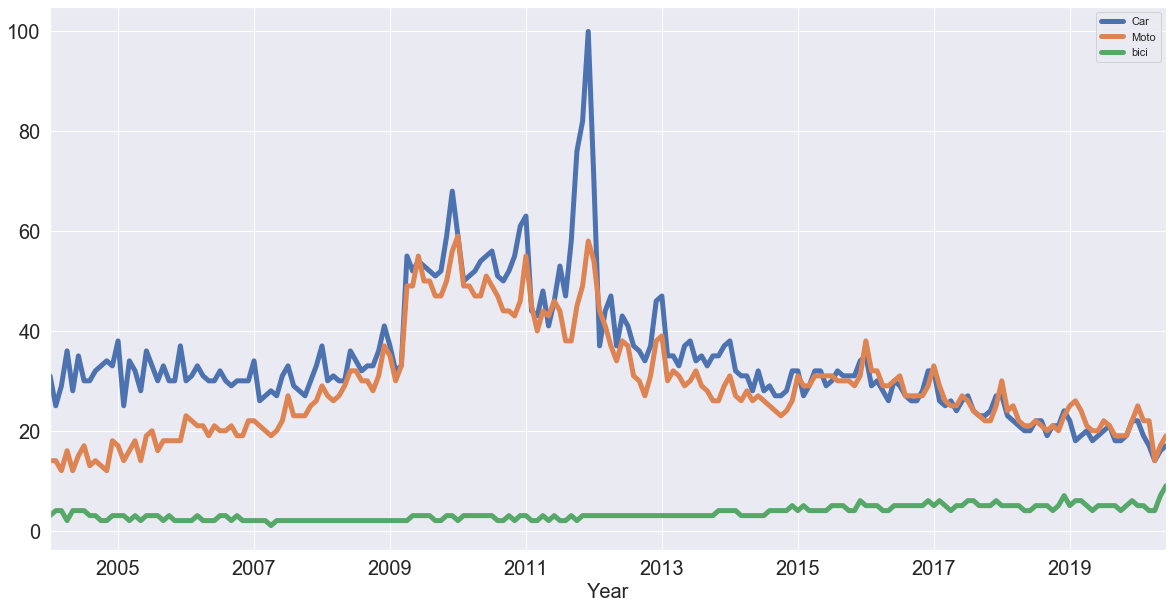

In [44]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [45]:
df.corr()

,Car,Moto,bici
Car,1.000000,0.820855,-0.449072
Moto,0.820855,1.000000,-0.211086
bici,-0.449072,-0.211086,1.000000


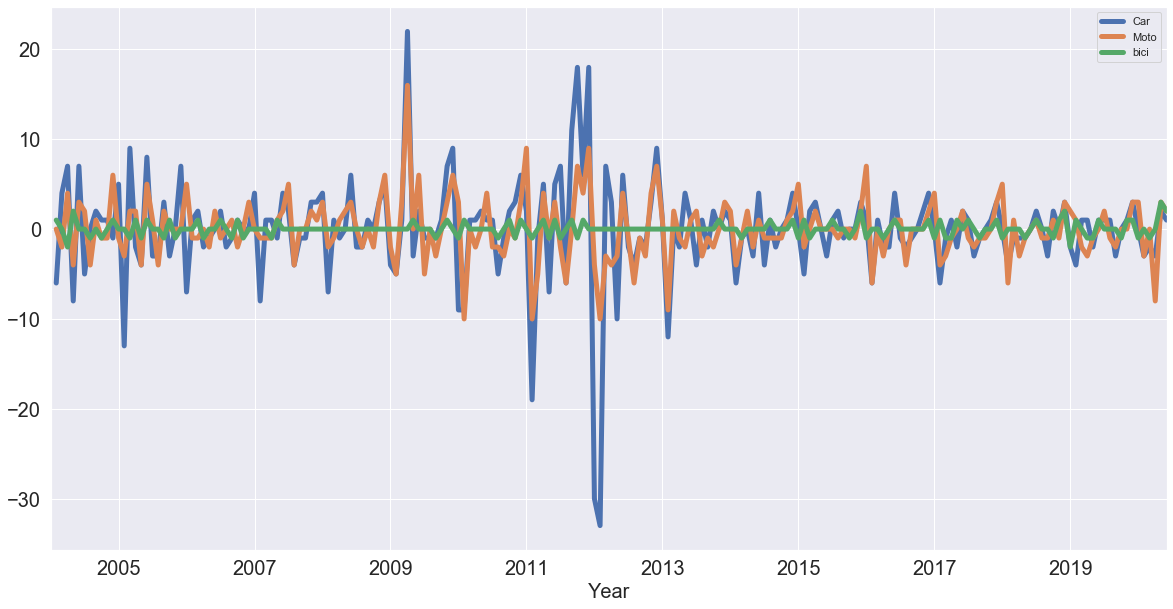

In [46]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [50]:
df.diff().corr()

,Car,Moto,bici
Car,1.000000,0.638776,0.051441
Moto,0.638776,1.000000,0.055888
bici,0.051441,0.055888,1.000000


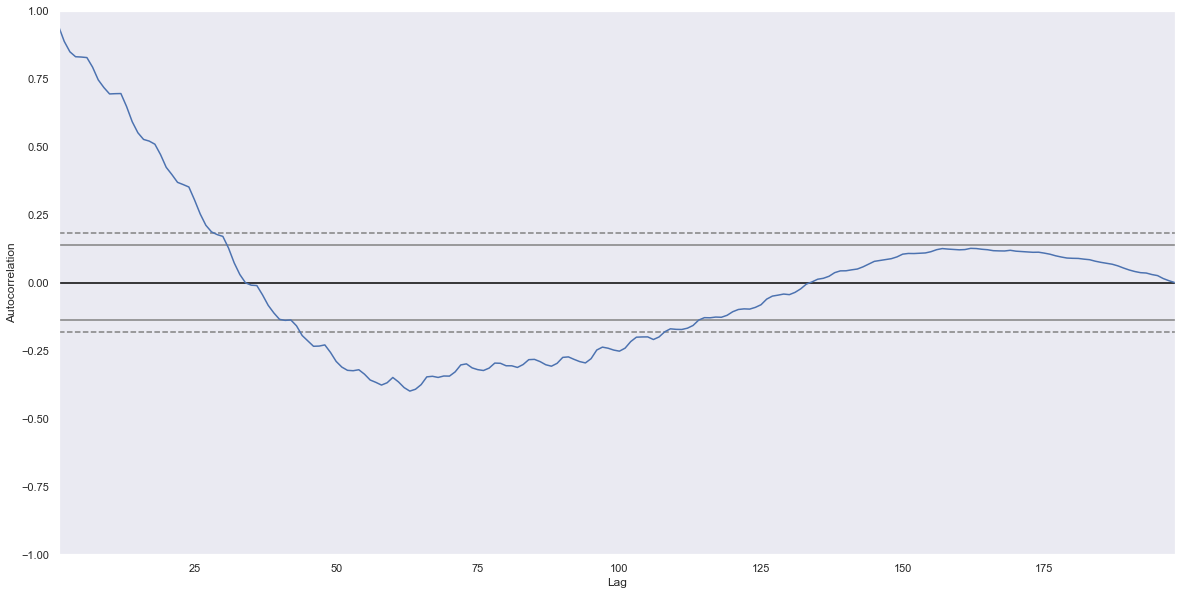

In [56]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df.Moto);